In [1]:
'''
                                            ** Problem Statement **
    Bicycle, as a model of transportation, has edge on environmental and health issues compared with other means of transproation. 
Therefore, many cities all around the world began to encourage bike usage by providing bike sharing programs, such as Mobike.
Riders can pick up bikes from one spot and return them to other designed place.

- About the dataset:
  The Capital Bike Sharing dataset from UCI contains information about a bike sharing program underway in Washington DC. 
  
  In other words, given this augmented (bike sharing details along with weather information) dataset, 
  can we forecast bike rental demand for this program?
'''

'\n                                            ** Problem Statement **\n    Bicycle, as a model of transportation, has edge on environmental and health issues compared with other means of transproation. \nTherefore, many cities all around the world began to encourage bike usage by providing bike sharing programs, such as Mobike.\nRiders can pick up bikes from one spot and return them to other designed place.\n\n- About the dataset:\n  The Capital Bike Sharing dataset from UCI contains information about a bike sharing program underway in Washington DC. \n  \n  In other words, given this augmented (bike sharing details along with weather information) dataset, \n  can we forecast bike rental demand for this program?\n'

In [2]:
import scipy.stats as stats

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [3]:
df_hour = pd.read_csv("data/hour.csv")
print(df_hour.shape)

# More than 17k records with 17 attributes.

(17379, 17)


In [4]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0
mean,8690.0,2.5,0.5,6.5,11.5,0.0,3.0,0.7,1.4,0.5,0.5,0.6,0.2,35.7,153.8,189.5
std,5017.0,1.1,0.5,3.4,6.9,0.2,2.0,0.5,0.6,0.2,0.2,0.2,0.1,49.3,151.4,181.4
min,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,4345.5,2.0,0.0,4.0,6.0,0.0,1.0,0.0,1.0,0.3,0.3,0.5,0.1,4.0,34.0,40.0
50%,8690.0,3.0,1.0,7.0,12.0,0.0,3.0,1.0,1.0,0.5,0.5,0.6,0.2,17.0,115.0,142.0
75%,13034.5,3.0,1.0,10.0,18.0,0.0,5.0,1.0,2.0,0.7,0.6,0.8,0.3,48.0,220.0,281.0
max,17379.0,4.0,1.0,12.0,23.0,1.0,6.0,1.0,4.0,1.0,1.0,1.0,0.9,367.0,886.0,977.0


In [5]:
df_hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.2,0.3,0.8,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.2,0.3,0.8,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.2,0.3,0.8,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.2,0.3,0.8,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.2,0.3,0.8,0.0,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.2,0.3,0.8,0.1,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.2,0.3,0.8,0.0,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.3,0.9,0.0,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.2,0.3,0.8,0.0,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.3,0.3,0.8,0.0,8,6,14


In [6]:
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
               ...   
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
Length: 17, dtype: object

In [7]:
list(df_hour)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [8]:
# cleans up the attribute names to make them more understandable and pythonic.
df_hour.rename(
    columns = {
     'instant' : "record_id",
     'dteday' : "datetime",
     'holiday' : "is_holiday",
     'workingday' : "is_workingday",
     'weathersit' : "weather_condition",
     'hum' : "humidity",
     'mnth' : "month",
     'cnt' : "total_count",
     'hr' : "hour",
     'yr' : "year"},
    inplace = True )

In [9]:
# cleans up the attribute type

df_hour['datetime'] = pd.to_datetime(df_hour.datetime)

df_hour['season'] = df_hour.season.astype('category')
df_hour['is_holiday'] = df_hour.is_holiday.astype('category')
df_hour['weekday'] = df_hour.weekday.astype('category')
df_hour['weather_condition'] = df_hour.weather_condition.astype('category')
df_hour['is_workingday'] = df_hour.is_workingday.astype('category')
df_hour['month'] = df_hour.month.astype('category')
df_hour['year'] = df_hour.year.astype('category')
df_hour['hour'] = df_hour.hour.astype('category')


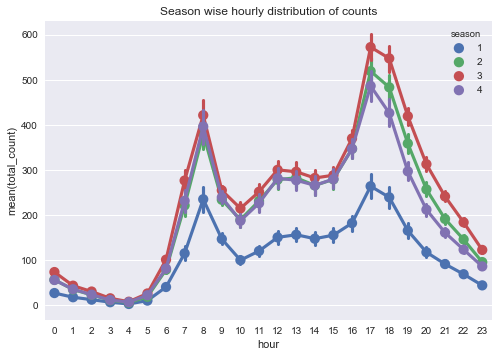

In [ ]:
# visualization on hourly ridership counts across the seasons.

fig, ax = plt.subplots()
sns.pointplot(data = df_hour[['hour', 'total_count', 'season']],
             x = 'hour', 
             y = 'total_count', 
             hue = 'season',
             ax = ax)
ax.set(title = "Season wise hourly distribution of counts")


In [ ]:
# visualization on weekly ridership counts.

fig, ax = plt.subplots()
sns.pointplot(data = df_hour[['hour', 'total_count', 'weekday']],
             x = 'hour', 
             y = 'total_count', 
             hue = 'weekday',
             ax = ax)
ax.set(title = "Weekday wise hourly distribution of counts")

In [ ]:
# visualization on monthly ridership counts.

fig, ax = plt.subplots()
sns.barplot(data = df_hour[['month', 'total_count']],
             x = 'month', 
             y = 'total_count', 
             ax = ax)
ax.set(title = "Monthly wise hourly distribution of counts")

# The months June-September see highest ridership.

In [ ]:
# visualization on seasonly ridership counts.

fig, ax = plt.subplots()
sns.barplot(data = df_hour[['season', 'total_count']],
             x = 'season', 
             y = 'total_count', 
             ax = ax)
ax.set(title = "Seasonly wise hourly distribution of counts")

In [ ]:
# visualization on yearly ridership counts using Boxplot.

fig, ax = plt.subplots()
sns.boxplot(data = df_hour[['year', 'total_count']],
             x = 'year', 
             y = 'total_count', 
             ax = ax)
ax.set(title = "Yearly wise hourly distribution of counts")

# dataset contains year value of 0 representing 2011 and 1 representing 2012. 

In [ ]:
# visualization on yearly ridership counts using Violin plots.
# violin plots with additional ability to visualize probability density of data, which is useful for multimodal data.

fig, ax = plt.subplots()
sns.violinplot(data = df_hour[['year', 'total_count']],
             x = 'year', 
             y = 'total_count', 
             ax = ax)
ax.set(title = "Yearly wise hourly distribution of counts")

# dataset contains year value of 0 representing 2011 and 1 representing 2012. 

In [ ]:
# Use boxplots to check for outliers in the data

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
sns.boxplot(data = df_hour[['total_count', 'casual', 'registered']], ax = ax1)
sns.boxplot(data = df_hour[['temp', 'windspeed']], ax = ax2)


In [ ]:
fig, ax = plt.subplots()

sns.boxplot(data = df_hour[['hour', 'total_count']],
             x = 'hour', 
             y = 'total_count', 
             ax = ax)

ax.set(title = "Boxplot for hourly distribution of counts")

In [ ]:
# Correlation  
# it helps us understand relationships between different attributes of the data. 
# which is useful for following feature engineering

In [ ]:
corr_mat = df_hour[['temp', 
                   'atemp', 
                   'humidity', 
                   'windspeed', 
                   'casual', 
                   'registered', 
                   'total_count']].corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr_mat, 
            mask = mask,
            vmax = .8,
            square = True,
            annot = True)

In [ ]:
# From the correlation matrix, we can summarize the following points:
# 1. Feature 'egistered' and 'casual' show strong positive correlation to 'total_count'.
# 2. Feature 'temp' and 'atemp' are highly correlated
# ...

In [ ]:
''' Regression '''

In [ ]:
# Prepare for training samples
# Encode Categoricals (One Hot Encoding)
def fit_transform_one_hot_encoding(df, col_name):
    '''
    This function performs one hot encoding for the specified
        column.
    
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series      
    '''
    
    # label encode the column
    le = preprocessing.LabelEncoder()
    encoded_labels = le.fit_transform(df[col_name])
    df[col_name + '_label'] = encoded_labels
    
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name + '_' + str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns = feature_labels)
    
    return le, ohe, features_df

In [ ]:
# Prepare for the test samples
def transform_ohe(df,le,ohe,col_name):
    
    encoded_labels = le.fit_transform(df[col_name])
    df[col_name + '_label'] = encoded_labels
    
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name + '_' + str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns = feature_labels)
    
    return features_df
    

In [ ]:
seed = 42

X, X_test, y, y_test = train_test_split(df_hour.iloc[:, 0:-3],
                                        df_hour.iloc[:, -1],
                                        test_size = 0.33,
                                        random_state = seed)
X.reset_index(inplace= True)
y = y.reset_index()

X_test.reset_index(inplace = True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

In [ ]:
## Normality Test
# This test helps us identify outliers, skewness, and so on. 

stats.probplot(y.total_count.tolist(), dist="norm", plot=plt)
plt.show()

In [ ]:
# loops through the list of categorical variables to transform and prepare a list of encoded attributes.

numeric_feature_cols = ['temp','humidity','windspeed',
                        'hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday',
                        'weather_condition','is_workingday']
cat_attr_list = ['season', 'is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday',
                 'month','year']


In [ ]:
encoded_attr_list = []

for col in cat_attr_list:
    return_obj = fit_transform_one_hot_encoding(X, col)
    encoded_attr_list.append({'label_enc': return_obj[0],
                              'ohe_enc': return_obj[1],
                              'feature_df': return_obj[2],
                              'col_name':col})

In [ ]:
# Then merge these one hot encoded categorical features and remaining numeric features together into a dataframe

feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] for enc in encoded_attr_list 
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

In [ ]:
'''
Linear Regression
'''

In [ ]:
# Train model

X = train_df_new
y = y.total_count.values.reshape(-1,1)

linear_regressor = linear_model.LinearRegression()

In [ ]:
predicted = cross_val_predict(linear_regressor, X, y, cv=10)

In [ ]:
# generate scatter plot between residuals and observed values.

fig, ax = plt.subplots()
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.plot()

In [ ]:
# To further quantify our findings related to the model, 
# we plot the cross-validation scores. We use the cross_val_score() function
#  It is important to understand if the data can be modeled by a linear model or not. 

In [ ]:
r2_scores = cross_val_score(linear_regressor, X, y, cv=10)
mse_scores = cross_val_score(linear_regressor, X, y, cv=10,scoring='neg_mean_squared_error')

In [ ]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

In [ ]:
# The r-squared or the coefficient of determination is 0.39 on an average for 10-fold cross validation. 
# This means that the predictor is only able to explain 39% of the variance in the target variable.

In [ ]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(mse_scores))],mse_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('Mean-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(mse_scores)))
plt.show()

In [ ]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

In [ ]:
linear_regressor.fit(X, y)

In [ ]:
# Test on testset

In [ ]:
# preprocess test data
test_encoded_attr_list = []

for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,le,ohe,col_name),
                                   'col_name':col_name})

In [ ]:

test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] for enc in test_encoded_attr_list if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1)
print("Shape::{}".format(test_df_new.shape))

In [ ]:
test_df_new.head()

In [ ]:

X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)


In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
y_test_prediction = linear_regressor.predict(X_test)

In [ ]:
residual = y_test - y_test_prediction

In [ ]:
r2_score = linear_regressor.score(X_test,y_test)

In [ ]:
# generate scatter plot between residuals and observed values.

fig, ax = plt.subplots()
ax.scatter(y_test, residual)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.plot()

In [ ]:
# It is clearly evident from our evaluation that the linear regression model 
# is unable to model the data to generate decent results.

# It seems that we would need to model this data using methods with non-linear modelling relationships.

In [ ]:
'''
Stats Models
'''

In [ ]:
import statsmodels.api as sm

In [ ]:
# Set the independent variable
X = X.values.tolist()

In [ ]:
X = sm.add_constant(X)

In [ ]:
X_test = X_test.values.tolist()
X_test = sm.add_constant(X_test)

In [ ]:
# Build OLS model

# ordinary least squares (OLS) or linear least squares 
# is a method for estimating the unknown parameters in a linear regression model.

model = sm.OLS(y, X)
res = model.fit()

In [ ]:
pred_y = res.predict(X_test)

In [ ]:
print(res.summary())

In [ ]:
plt.scatter(pred_y,y_test)